In [1]:
!if [ $(pip list | grep "seaborn" | awk '{ print $2 }' | awk 'NR < 2') != 0.13.1 ]; then pip install seaborn==0.13.1; fi
!if [ $(pip list | grep "matplotlib" | awk '{ print $2 }' | awk 'NR < 2') != 3.8.2 ]; then pip install matplotlib==3.8.2; fi


In [2]:
import pandas as pd
import pandas.core.frame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tools.kyoulee_tools import *

In [3]:
# 미션 수행을 위해 데이터셋을 로드합니다.
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [4]:
show_unique(df)

🚀 unique values
gender [2]{object} : ['Female', 'Male']
SeniorCitizen [2]{int64} : [0, 1]
Partner [2]{object} : ['No', 'Yes']
Dependents [2]{object} : ['No', 'Yes']
tenure [73]{int64} : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]
PhoneService [2]{object} : ['No', 'Yes']
MultipleLines [3]{object} : ['No', 'No phone service', 'Yes']
InternetService [3]{object} : ['DSL', 'Fiber optic', 'No']
OnlineSecurity [3]{object} : ['No', 'No internet service', 'Yes']
OnlineBackup [3]{object} : ['No', 'No internet service', 'Yes']
DeviceProtection [3]{object} : ['No', 'No internet service', 'Yes']
TechSupport [3]{object} : ['No', 'No internet service', 'Yes']
StreamingTV [3]{object} : ['No', 'No internet service', 'Yes']
StreamingMovies [3]{object} : ['No', 'No inte

In [5]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [6]:
show_unique(df)
data_check_null(df)
data_check_object(df)

🚀 unique values
gender [2]{object} : ['Female', 'Male']
SeniorCitizen [2]{int64} : [0, 1]
Partner [2]{object} : ['No', 'Yes']
Dependents [2]{object} : ['No', 'Yes']
tenure [73]{int64} : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]
PhoneService [2]{object} : ['No', 'Yes']
MultipleLines [3]{object} : ['No', 'No phone service', 'Yes']
InternetService [3]{object} : ['DSL', 'Fiber optic', 'No']
OnlineSecurity [3]{object} : ['No', 'No internet service', 'Yes']
OnlineBackup [3]{object} : ['No', 'No internet service', 'Yes']
DeviceProtection [3]{object} : ['No', 'No internet service', 'Yes']
TechSupport [3]{object} : ['No', 'No internet service', 'Yes']
StreamingTV [3]{object} : ['No', 'No internet service', 'Yes']
StreamingMovies [3]{object} : ['No', 'No inte

In [7]:
df = df[df["TotalCharges"].isnull() != True]
data_check_null(df)
data_check_object(df)

🚀 NULL Check
OK
🚀 '' Check
OK


/Users/kyoulee/github/liebespaar93/Coaching_Study_Data_Science_Projects_2024/kyoulee/week_2/tools/show_plot.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax=axes[col])
/Users/kyoulee/github/liebespaar93/Coaching_Study_Data_Science_Projects_2024/kyoulee/week_2/tools/show_plot.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwask

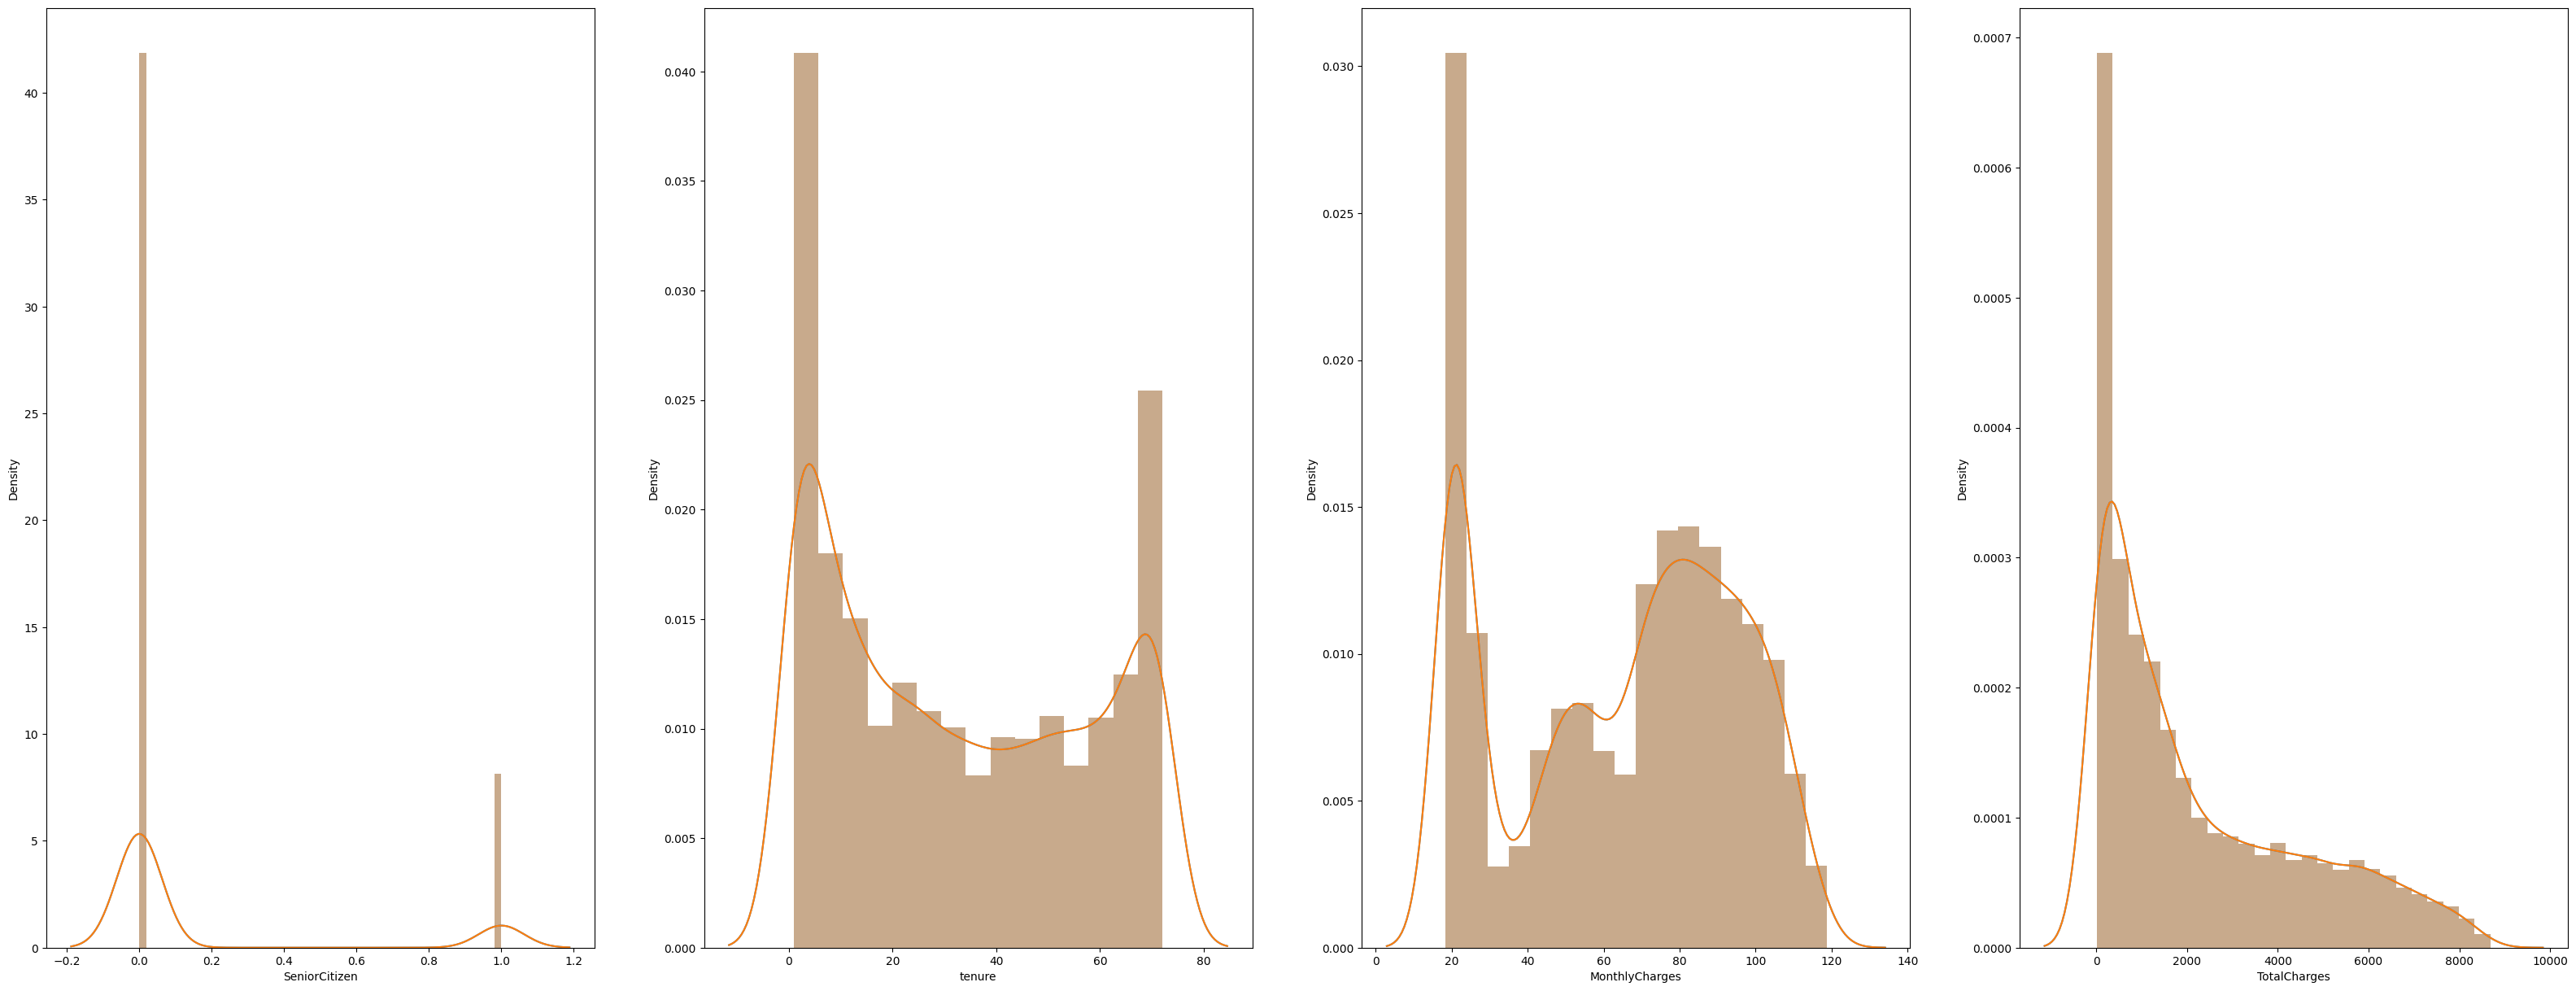

In [8]:
show_distplot(
    df, ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"], 4, 40, 15
)

/Users/kyoulee/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/kyoulee/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


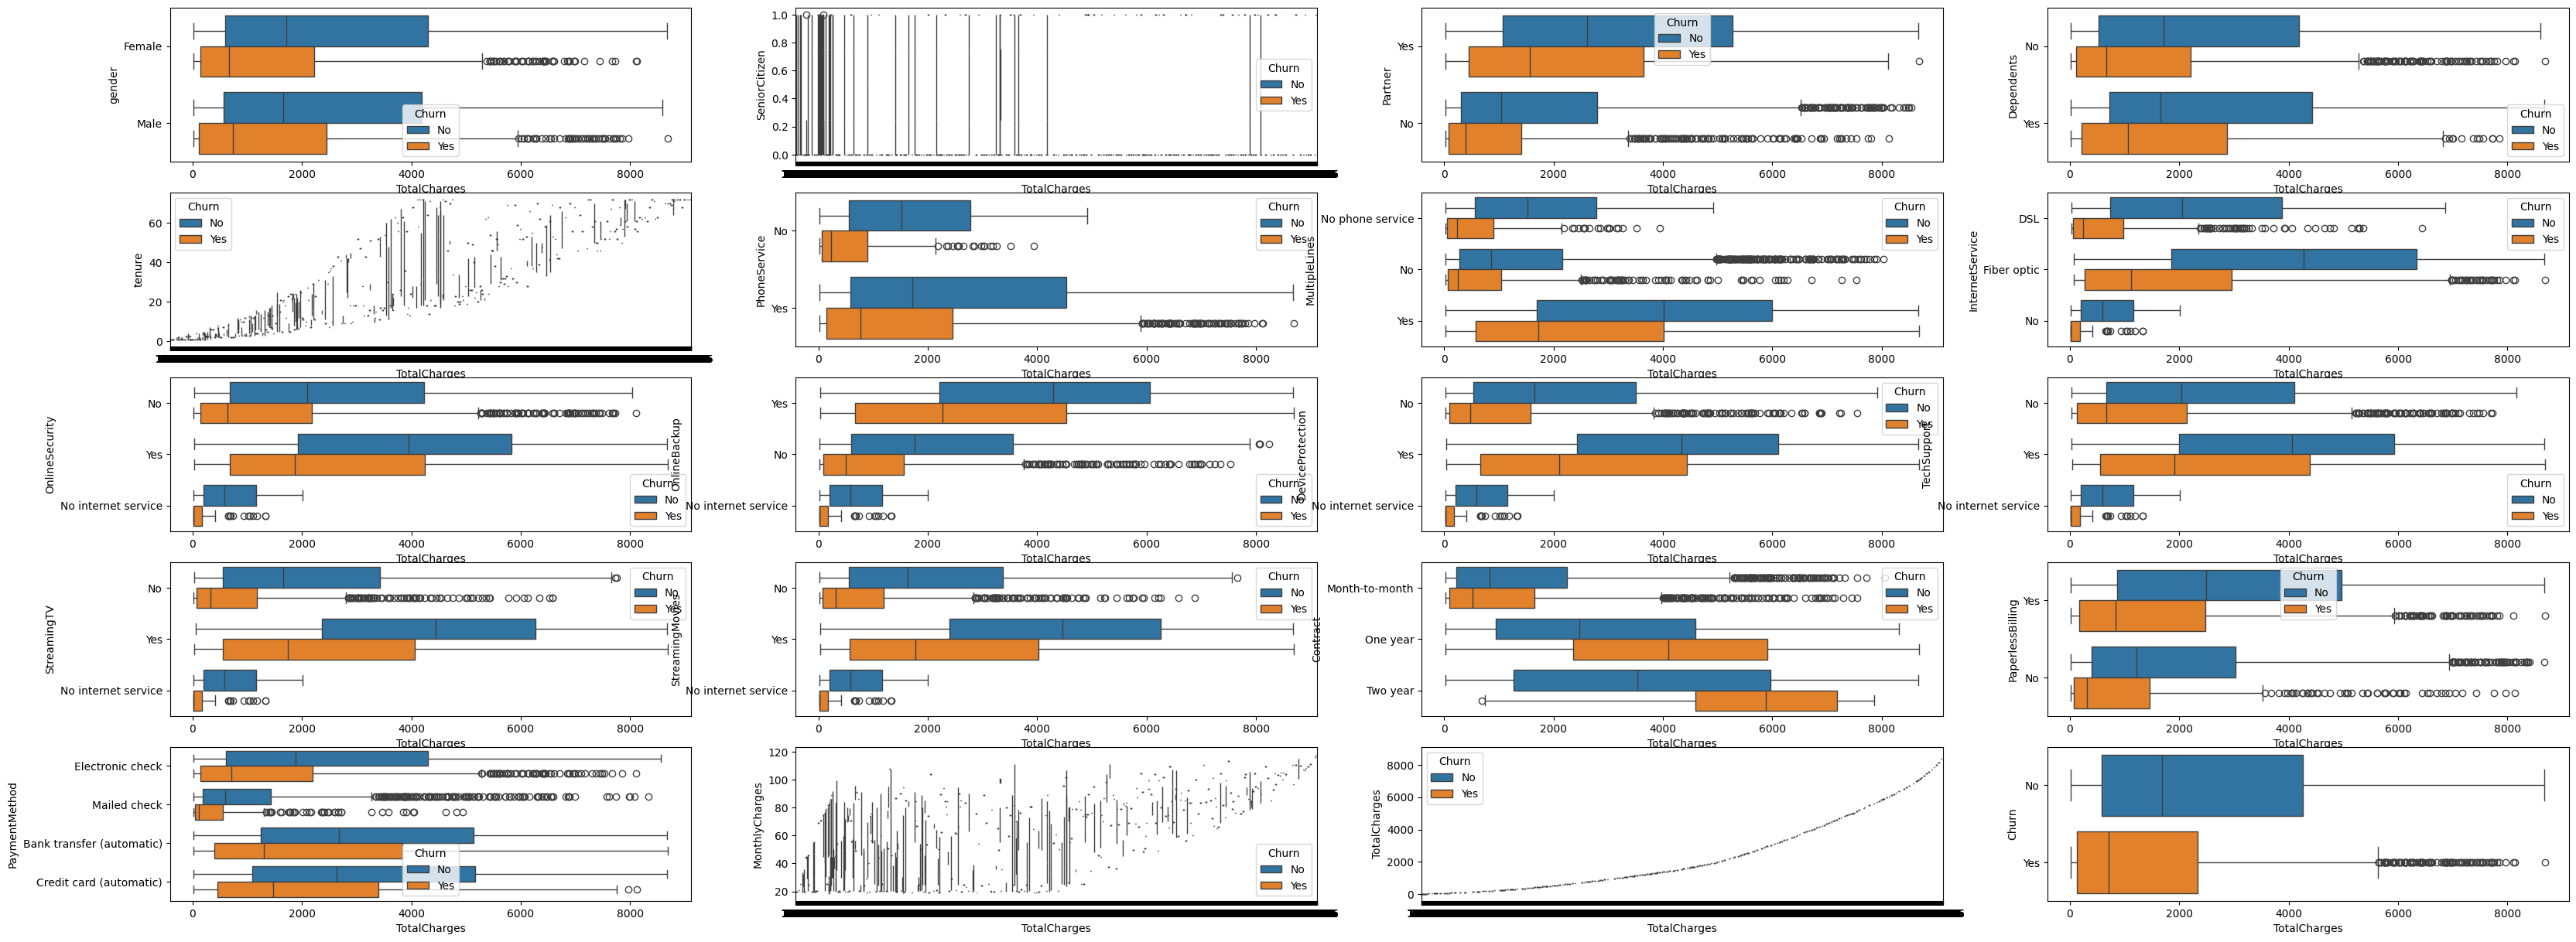

In [9]:

show_boxplot(df, df.columns.to_list(), 4, "TotalCharges", "Churn", 40,15)

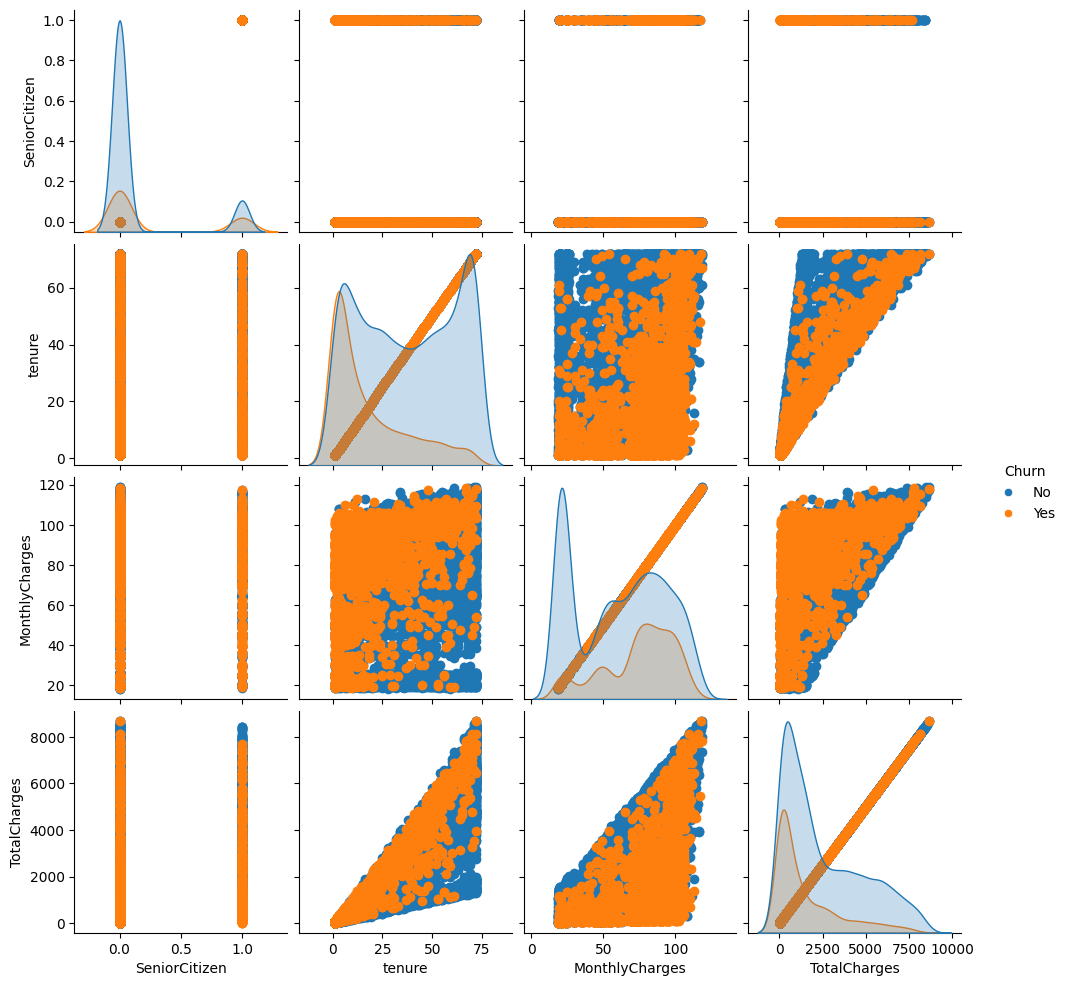

In [10]:
g = sns.pairplot(df, hue="Churn")
g.map(plt.scatter)

In [11]:
nunique = df.nunique()
category_col = nunique[nunique < 5]
category_col_name = category_col.index.tolist()
category_col

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

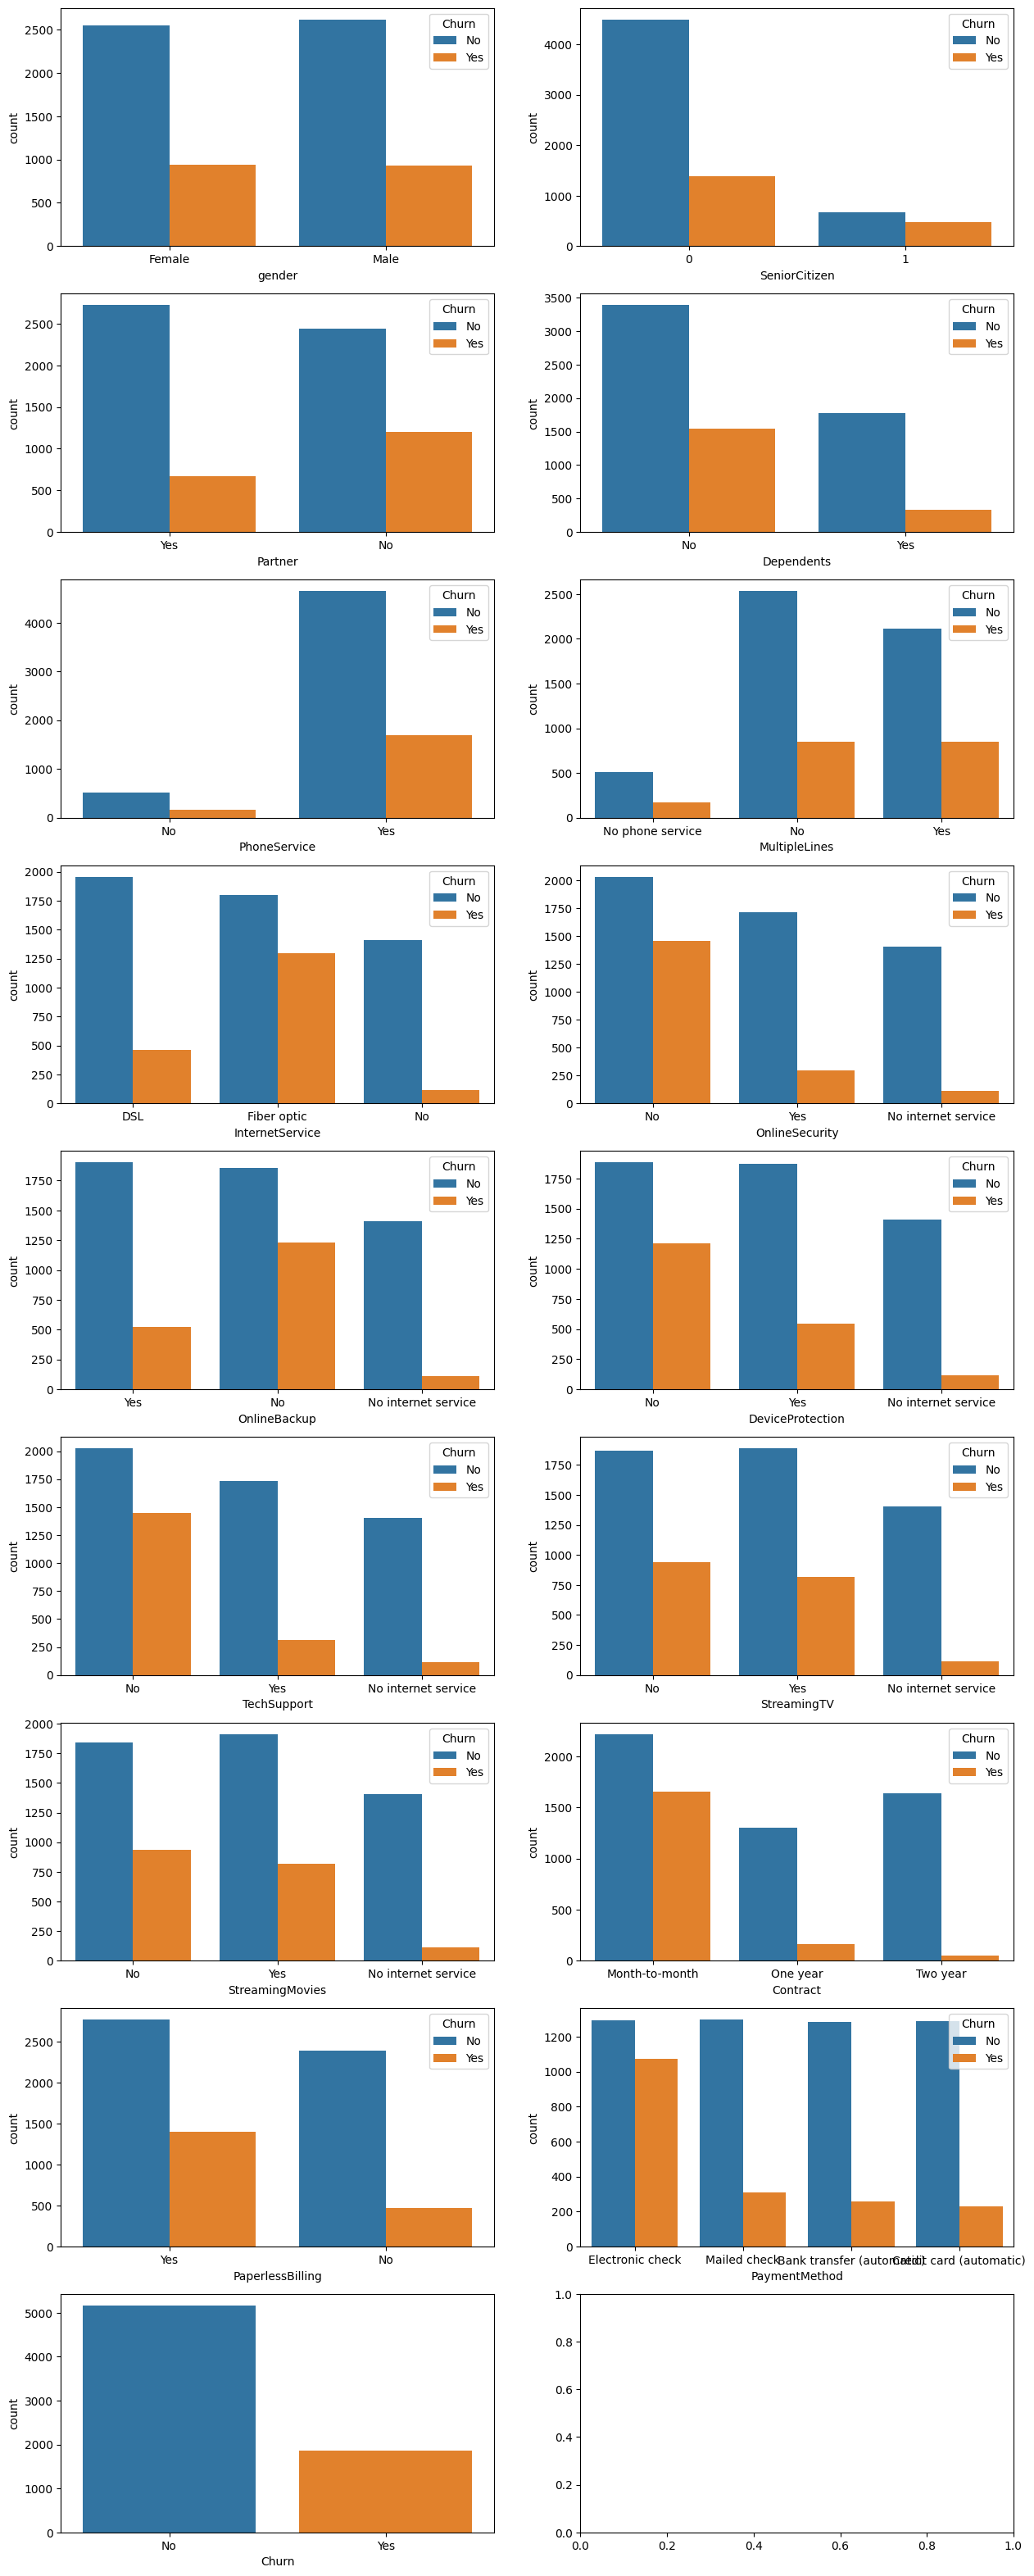

In [12]:
show_countplot(df, category_col_name, 2, "Churn", 15, 40)

In [14]:
show_unique(df[category_col_name])

test_df = data_make_number(
    df,
    [
        "gender",
        "Partner",
        "Dependents",
        "PhoneService",
        "MultipleLines",
        "InternetService",
        "OnlineSecurity",
        "OnlineBackup",
        "DeviceProtection",
        "TechSupport",
        "StreamingTV",
        "StreamingMovies",
        "Contract",
        "PaperlessBilling",
        "Churn"
    ],
    [
        ["Female", "Male"],
        ["No", "Yes"],
        ["No", "Yes"],
        ["No", "Yes"],
        ["No phone service", "No", "Yes"],
        ["No", "DSL", "Fiber optic"],
        ["No internet service", "No", "Yes"],
        ["No internet service", "No", "Yes"],
        ["No internet service", "No", "Yes"],
        ["No internet service", "No", "Yes"],
        ["No internet service", "No", "Yes"],
        ["No internet service", "No", "Yes"],
        ['Month-to-month', 'One year', 'Two year'],
        ['No', 'Yes'],
        ['No', 'Yes']
    ],
)

🚀 unique values
gender [2]{object} : ['Female', 'Male']
SeniorCitizen [2]{int64} : [0, 1]
Partner [2]{object} : ['No', 'Yes']
Dependents [2]{object} : ['No', 'Yes']
PhoneService [2]{object} : ['No', 'Yes']
MultipleLines [3]{object} : ['No', 'No phone service', 'Yes']
InternetService [3]{object} : ['DSL', 'Fiber optic', 'No']
OnlineSecurity [3]{object} : ['No', 'No internet service', 'Yes']
OnlineBackup [3]{object} : ['No', 'No internet service', 'Yes']
DeviceProtection [3]{object} : ['No', 'No internet service', 'Yes']
TechSupport [3]{object} : ['No', 'No internet service', 'Yes']
StreamingTV [3]{object} : ['No', 'No internet service', 'Yes']
StreamingMovies [3]{object} : ['No', 'No internet service', 'Yes']
Contract [3]{object} : ['Month-to-month', 'One year', 'Two year']
PaperlessBilling [2]{object} : ['No', 'Yes']
PaymentMethod [4]{object} : ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']
Churn [2]{object} : ['No', 'Yes']
OK
🚀 make values

In [15]:
columns_num = test_df._get_numeric_data().columns.tolist()
show_unique(test_df[columns_num])

🚀 unique values
gender [2]{float64} : [0.0, 1.0]
SeniorCitizen [2]{int64} : [0, 1]
Partner [2]{float64} : [0.0, 1.0]
Dependents [2]{float64} : [0.0, 1.0]
tenure [72]{int64} : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]
PhoneService [2]{float64} : [0.0, 1.0]
MultipleLines [3]{float64} : [0.0, 1.0, 2.0]
InternetService [3]{float64} : [0.0, 1.0, 2.0]
OnlineSecurity [3]{float64} : [0.0, 1.0, 2.0]
OnlineBackup [3]{float64} : [0.0, 1.0, 2.0]
DeviceProtection [3]{float64} : [0.0, 1.0, 2.0]
TechSupport [3]{float64} : [0.0, 1.0, 2.0]
StreamingTV [3]{float64} : [0.0, 1.0, 2.0]
StreamingMovies [3]{float64} : [0.0, 1.0, 2.0]
Contract [3]{float64} : [0.0, 1.0, 2.0]
PaperlessBilling [2]{float64} : [0.0, 1.0]
MonthlyCharges [1584]{float64} : [18.25, 18.4, 18.55, 18.7, 

<Axes: >

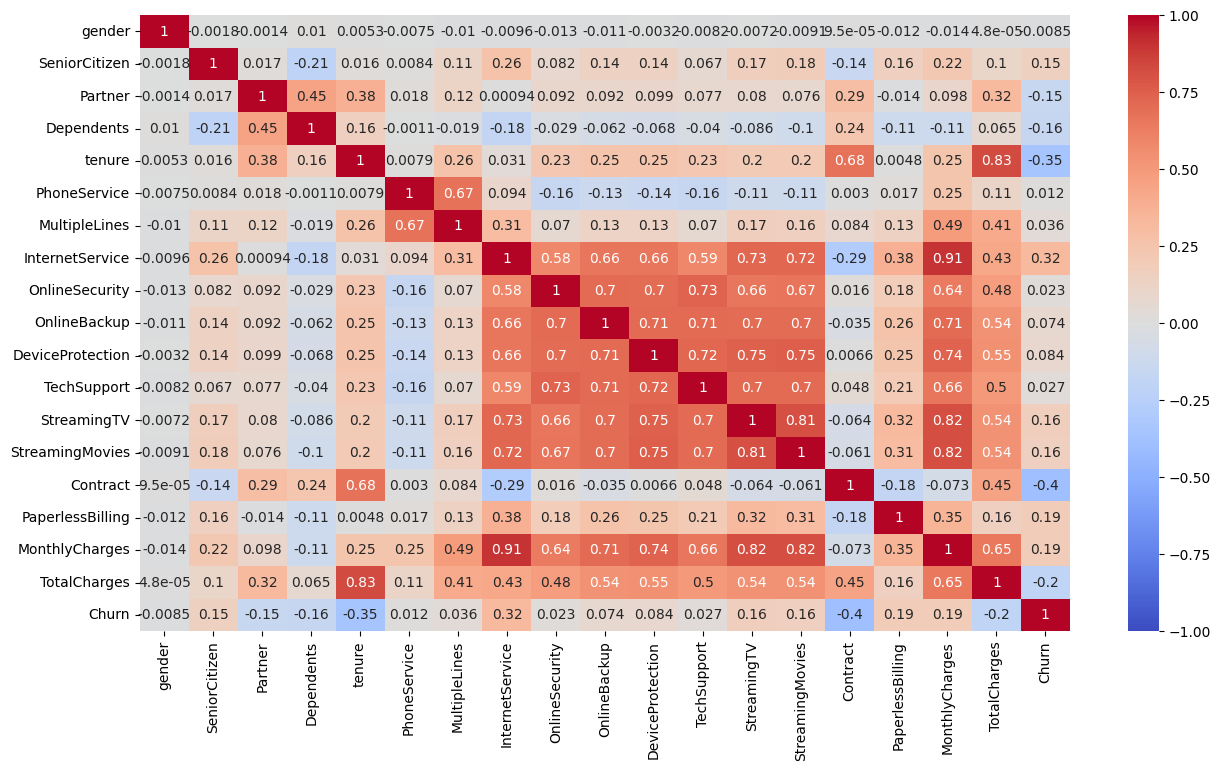

In [16]:
df_corr = test_df[columns_num].corr()
df_corr.style.background_gradient()

plt.figure(figsize=(15, 8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

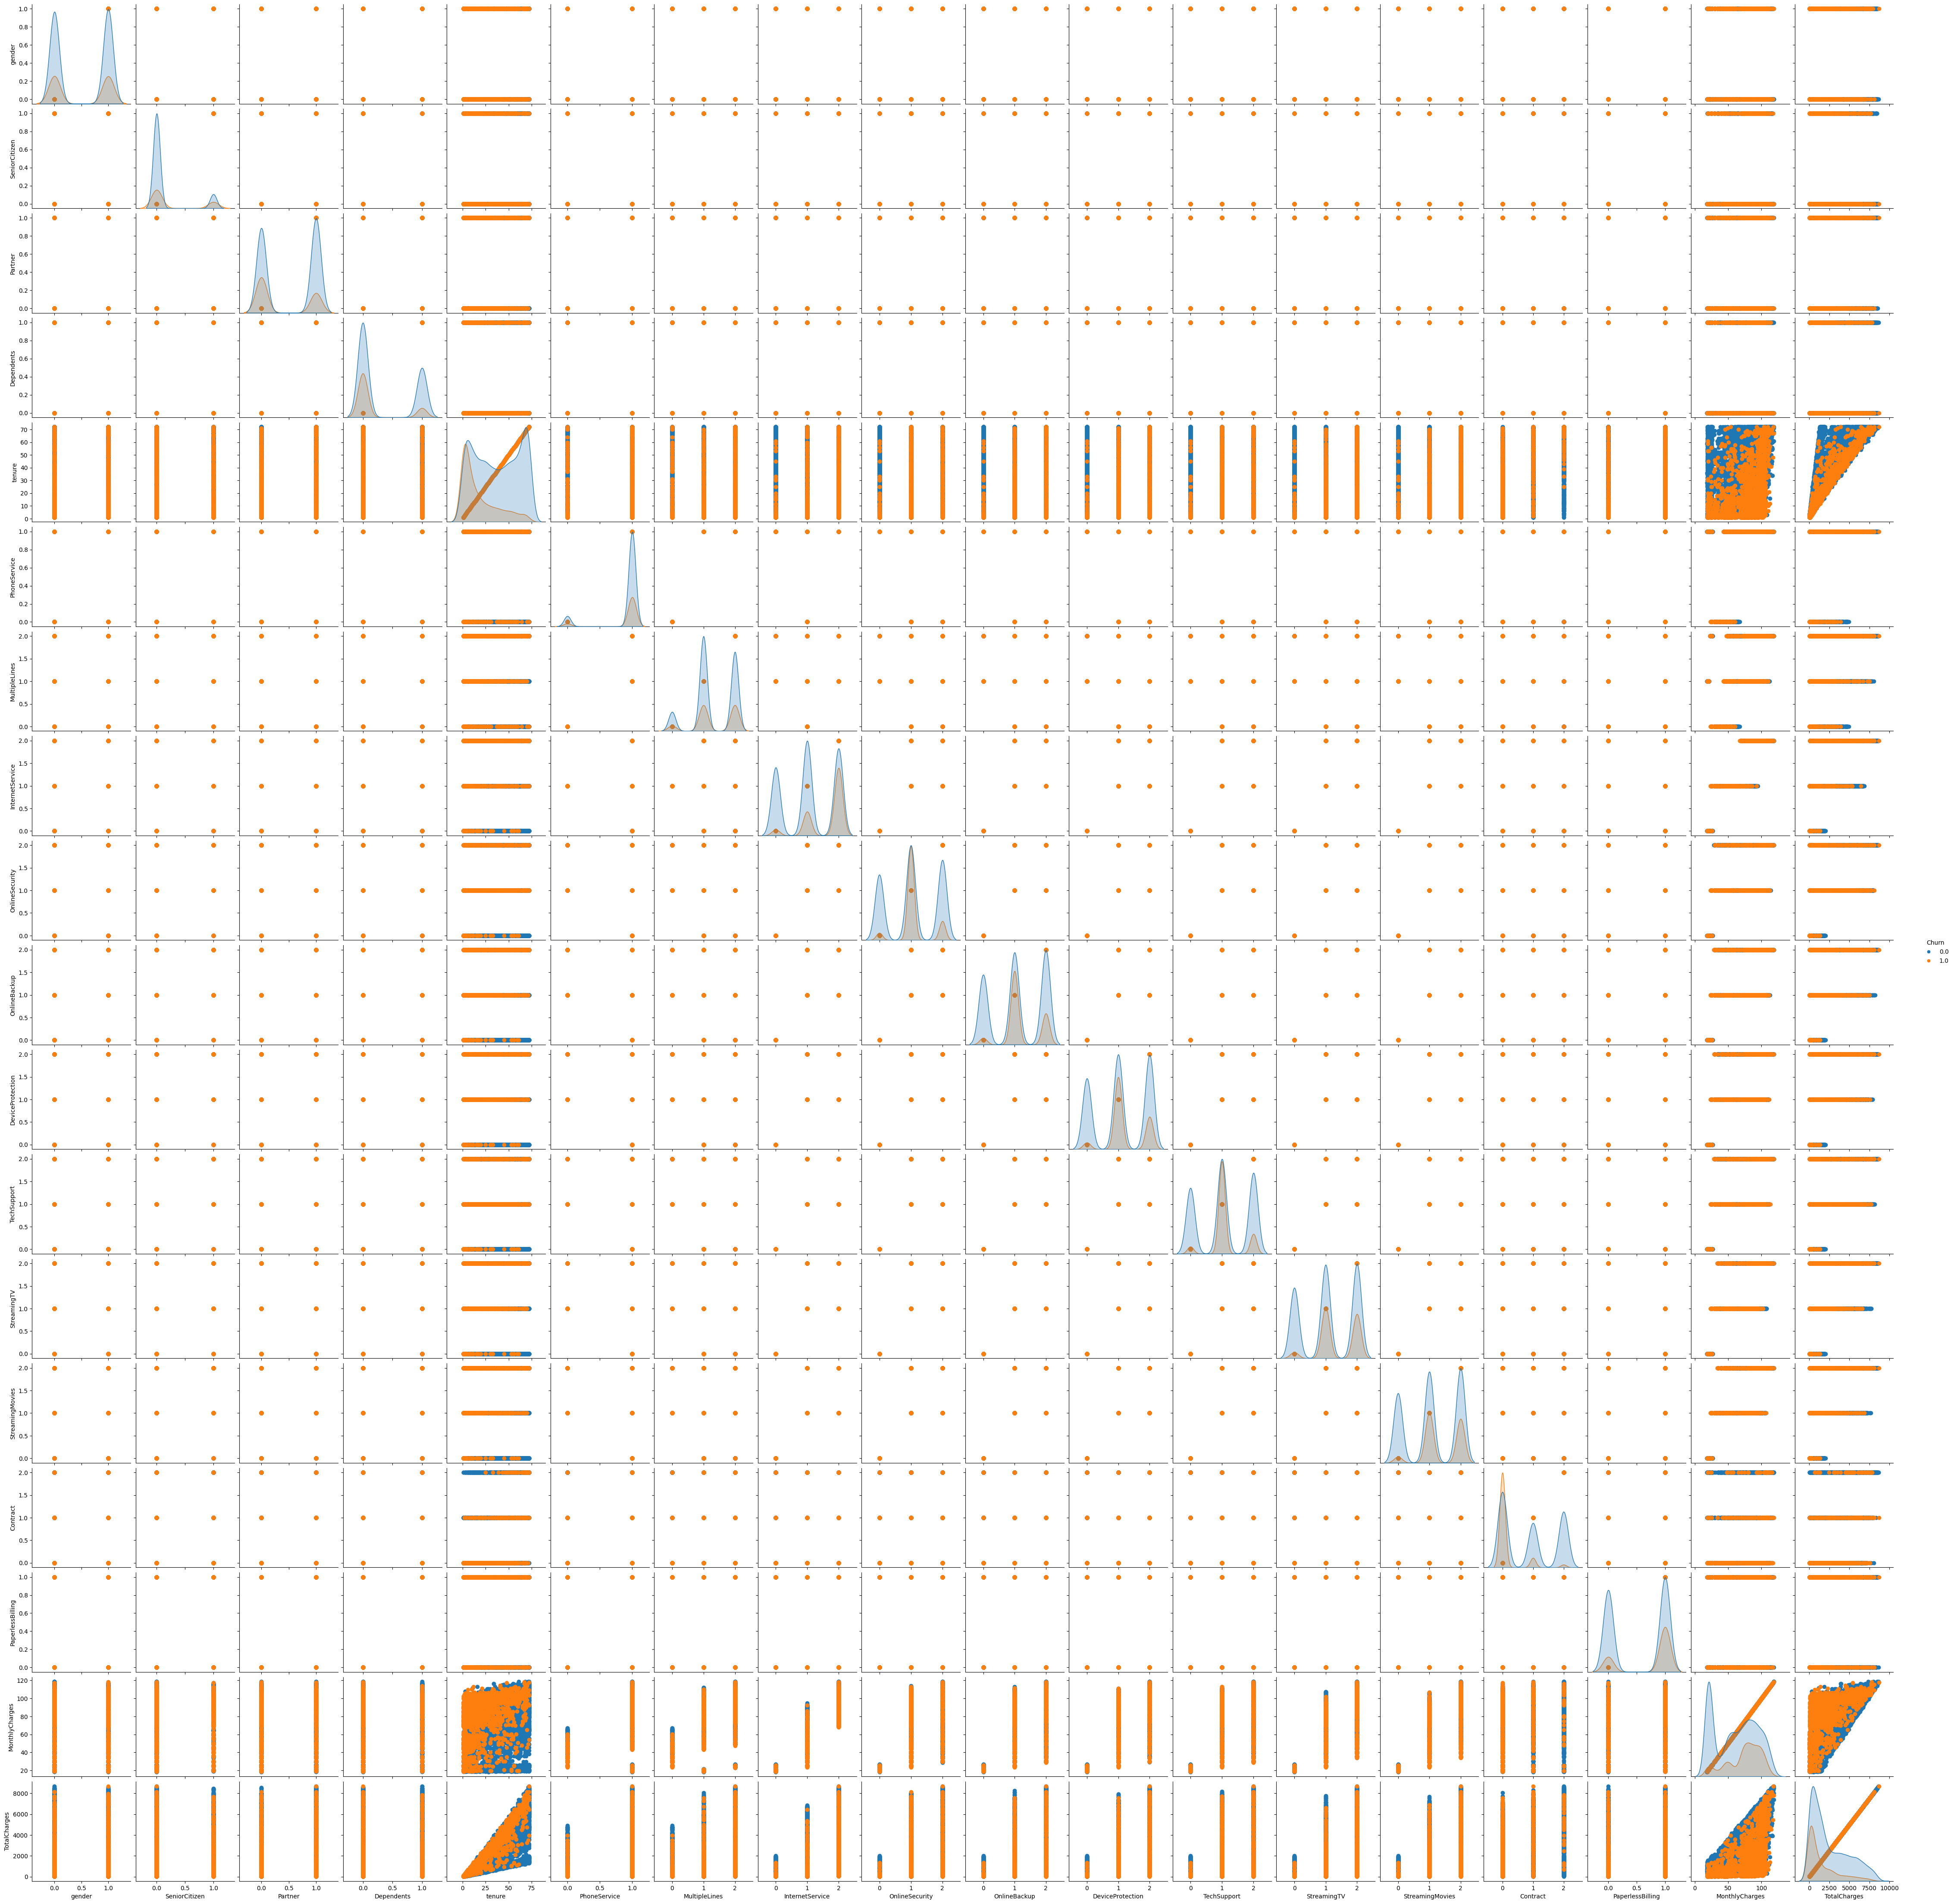

In [17]:
df_pair = sns.pairplot(test_df, hue="Churn")
df_pair.map(plt.scatter)